In [1]:
#1.Importing Required Pacakeges
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  confusion_matrix,classification_report,mean_absolute_error,r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# 2. Load winequality-red.csv data.
dataset_url='D:/all_downlads 3/winequality-red.csv'
wine=pd.read_csv(dataset_url,sep=';')
wine.head(3)
#print(np.unique(wine['quality']))
#wine.isnull().sum()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
#Preprocessing data
bins=(2,6.5,8)
group_names=['bad','good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=group_names)
wine.quality.unique()


[bad, good]
Categories (2, object): [bad < good]

In [11]:
wine.head(3)
wine.quality.unique()

[bad, good]
Categories (2, object): [bad < good]

In [12]:
label_quality=LabelEncoder()
wine['quality']=label_quality.fit_transform(wine['quality'])
wine.head(12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


0    1382
1     217
Name: quality, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


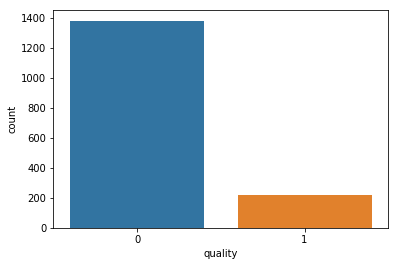

In [5]:
print(wine['quality'].value_counts())
print(sns.countplot(wine['quality']))

In [14]:
# . Split data into training and test sets
y = wine['quality']
X = wine.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

In [16]:
# Apply Standard Scaling to get optimized result
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:3]
X_test[:3]

array([[ 1.1862755 , -0.65575159,  1.42792243,  0.48480088, -0.24856087,
         0.58620552,  0.2490745 ,  1.49602048, -1.05245987,  1.36897567,
        -0.50350745],
       [-0.08174684,  0.24435912, -0.07117383, -0.24279866, -0.58573107,
         1.15643511,  0.59530798, -0.45686438, -0.07381298, -1.37111804,
        -0.31788058],
       [-0.88867014,  0.80692832, -1.41519117, -0.46107852, -0.16426832,
         0.58620552, -0.22306207,  0.12900108,  0.57861828,  0.47546685,
        -0.68913433]])

In [17]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Random Forest Classifire

In [21]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)
pred_rfc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [34]:
#Let see how our model performed
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(mean_absolute_error(y_test,pred_rfc))
print(r2_score(y_test,pred_rfc))
acc_randomforest = round(accuracy_score(y_test,pred_rfc) * 100, 2)
print(acc_randomforest)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       277
           1       0.88      0.65      0.75        43

   micro avg       0.94      0.94      0.94       320
   macro avg       0.91      0.82      0.86       320
weighted avg       0.94      0.94      0.94       320

[[273   4]
 [ 15  28]]
0.059375
0.489547477121988
94.06


SVM Classifier

In [19]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

In [24]:
        #Let see how our model performed
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))
print(mean_absolute_error(y_test,pred_clf))
print(r2_score(y_test,pred_clf))
acc_svm = round(accuracy_score(y_test,pred_clf) * 100, 2)
print(acc_svm)

             precision    recall  f1-score   support

          0       0.91      0.98      0.94       277
          1       0.76      0.37      0.50        43

avg / total       0.89      0.90      0.88       320

[[272   5]
 [ 27  16]]
0.1
0.1402904877844009
90.0


Neural Network

In [30]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
      #Let see how our model performed
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))
print(mean_absolute_error(y_test,pred_mlpc))
print(r2_score(y_test,pred_mlpc))
acc_NN = round(accuracy_score(y_test,pred_mlpc) * 100, 2)
print(acc_NN)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       277
           1       0.73      0.56      0.63        43

   micro avg       0.91      0.91      0.91       320
   macro avg       0.83      0.76      0.79       320
weighted avg       0.91      0.91      0.91       320

[[268   9]
 [ 19  24]]
0.0875
0.2477541768113508
91.25
